In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
from datetime import date, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


%matplotlib inline

sns.set(color_codes=True)
pd.set_option('display.max_columns', 100)

In [19]:
df = pd.read_csv('df_clean.csv')

In [76]:
customer = df.customer_id.unique()
salary_interval = []
date_interval = []
for i in customer:
    temp = df[(df.customer_id == i) & (df.txn_description == 'PAY/SALARY')][['amount', 'date']]
    temp['date'] = pd.to_datetime(temp['date'])
    count = len(temp)
    s = []
    lvl = []
    for j in range(count - 1):
        s.append(temp['date'].iloc[j+1] - temp['date'].iloc[j])
        lvl.append(temp['amount'].iloc[j])
    salary_interval.append(max(lvl))
    date_interval.append(max(s).days)

annual_salary = pd.DataFrame({'customer_id': customer, 'annual_salary': np.rint(np.array(salary_interval)/np.array(date_interval))*365.25})

In [79]:
annual_salary

,customer_id,annual_salary
0,CUS-2487424745,52961.25
1,CUS-2142601169,52230.75
2,CUS-1614226872,46386.75
3,CUS-2688605418,60631.50
4,CUS-4123612273,55883.25
...,...,...
95,CUS-2505971401,101539.50
96,CUS-2819545904,84372.75
97,CUS-3395687666,46021.50
98,CUS-1147642491,89121.00


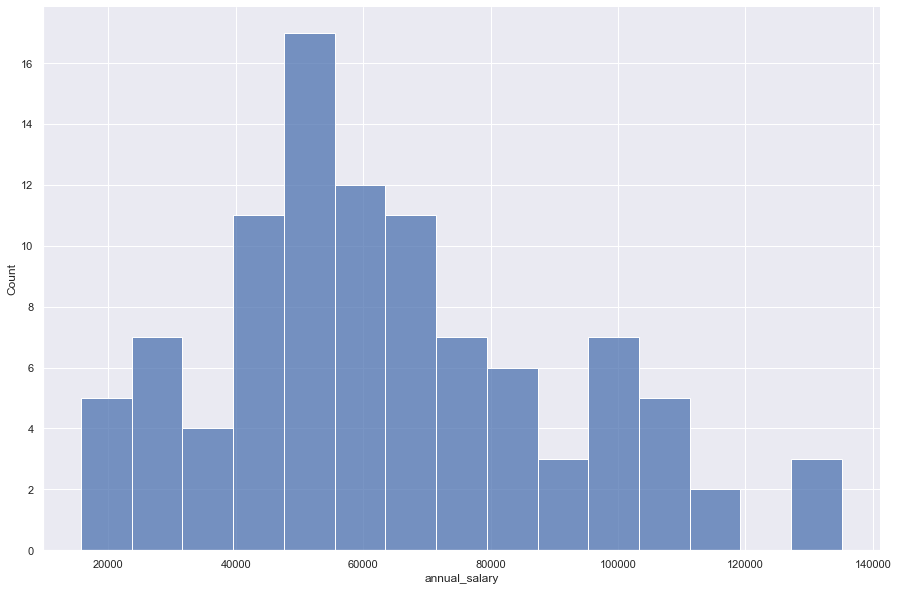

In [80]:
plt.figure(figsize = (15, 10))
sns.histplot(x = 'annual_salary', data = annual_salary, bins = 15)
sns.despine();

In [81]:
salary_td = df[df['txn_description'] == 'PAY/SALARY']

In [82]:
salary_td.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,hour,weekday,purchase,week
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,8342.11,2018-08-01 00:00:00,M,23,NaN,NaN,2018-08-01 11:00:00,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,11,3,False,31
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,2040.58,2018-08-01 00:00:00,F,23,NaN,NaN,2018-08-01 12:00:00,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,12,3,False,31
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,3158.51,2018-08-01 00:00:00,M,22,NaN,NaN,2018-08-01 12:00:00,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,12,3,False,31
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,2517.66,2018-08-01 00:00:00,M,24,NaN,NaN,2018-08-01 13:00:00,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,13,3,False,31
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,2271.79,2018-08-01 00:00:00,F,43,NaN,NaN,2018-08-01 13:00:00,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,13,3,False,31


In [83]:
salary_td = salary_td.drop([
                'status',
                'card_present_flag',
                'bpay_biller_code',
                'currency',
                'merchant_id',
                'merchant_code',
                'date',
                'txn_description',
                'merchant_suburb',
                'merchant_state',
                'extraction',
                'transaction_id',
                'country',
                'merchant_long_lat',
                'movement',
                'hour',
                'weekday',
                'purchase',
                'week'
            ], axis=1)

In [84]:
salary_td = salary_td.reset_index(drop=True)

In [85]:
long_lat = salary_td['long_lat'].str.split('-', n=1, expand=True)

In [86]:
salary_td['long'] = long_lat[0]
salary_td['lat'] = long_lat[1]

In [87]:
salary_td = salary_td.drop(['long_lat'], axis=1)

In [88]:
salary_td = salary_td.drop_duplicates().reset_index(drop=True)

In [89]:
salary_td

,account,first_name,balance,gender,age,amount,customer_id,long,lat
0,ACC-588564840,Isaiah,8342.11,M,23,3903.95,CUS-1462656821,151.27,33.76
1,ACC-1650504218,Marissa,2040.58,F,23,1626.48,CUS-2500783281,145.01,37.93
2,ACC-3326339947,Eric,3158.51,M,22,983.36,CUS-326006476,151.18,33.80
3,ACC-3541460373,Jeffrey,2517.66,M,24,1408.08,CUS-1433879684,145.00,37.83
4,ACC-2776252858,Kristin,2271.79,F,43,1068.04,CUS-4123612273,144.95,37.76
...,...,...,...,...,...,...,...,...,...
878,ACC-1973887809,Antonio,9378.51,M,26,1098.91,CUS-1646621553,115.78,31.90
879,ACC-819621312,Michele,3440.01,F,30,1158.15,CUS-1271030853,145.04,37.85
880,ACC-2920611728,Tyler,11381.44,M,69,1043.12,CUS-1388323263,144.96,37.76
881,ACC-1799207998,Susan,11454.52,F,20,1395.49,CUS-164374203,150.68,33.79


In [90]:
customers = df['customer_id'].unique()

In [92]:
cust_data = {
    'account': [],
    'first_name': [],
    'gender': [],
    'customer_id': [],
    'long': [],
    'lat': [],
    'age': [],
    'avg_bal': [],
    'avg_sal': []
}

for cust in customers:
    cust_td = salary_td[salary_td['customer_id'] == cust]
    cust_td = cust_td.reset_index(drop=True)
    account = cust_td['account'][0]
    first_name = cust_td['first_name'][0]
    gender = cust_td['gender'][0]
    long = cust_td['long'][0]
    lat = cust_td['lat'][0]
    age = cust_td['age'][0]
    amount = cust_td['amount'][0]
    balance = cust_td['balance'][0]
    avg_bal = round(sum(cust_td['balance']) / len(cust_td), 2)
    avg_sal = round(sum(cust_td['amount']) / len(cust_td), 2)
    
    cust_data['account'].append(account)
    cust_data['first_name'].append(first_name)
    cust_data['gender'].append(gender)
    cust_data['long'].append(long)
    cust_data['lat'].append(lat)
    cust_data['age'].append(age)
    cust_data['avg_bal'].append(avg_bal)
    cust_data['avg_sal'].append(avg_sal)
    cust_data['customer_id'].append(cust)

In [93]:
customer_df = pd.DataFrame(cust_data)

In [94]:
customer_df

,account,first_name,gender,customer_id,long,lat,age,avg_bal,avg_sal
0,ACC-1598451071,Diana,F,CUS-2487424745,153.41,27.95,26,2140.27,1013.67
1,ACC-1222300524,Michael,M,CUS-2142601169,151.23,33.94,38,1755.89,1002.13
2,ACC-1037050564,Rhonda,F,CUS-1614226872,153.10,27.66,40,3959.40,892.09
3,ACC-1608363396,Robert,M,CUS-2688605418,151.22,33.87,20,6793.49,2320.30
4,ACC-2776252858,Kristin,F,CUS-4123612273,144.95,37.76,43,5210.70,1068.04
...,...,...,...,...,...,...,...,...,...
95,ACC-2528867619,Abigail,F,CUS-2505971401,138.58,34.96,40,11622.62,1946.57
96,ACC-2650850707,Brian,M,CUS-2819545904,148.16,23.52,42,113253.76,3231.26
97,ACC-1998563091,David,M,CUS-3395687666,149.03,35.25,42,17569.02,1757.81
98,ACC-3233697971,Robin,F,CUS-1147642491,151.04,33.77,34,8813.47,1711.39


In [95]:
features = customer_df.copy()

In [96]:
features = pd.get_dummies(features, columns=['gender'], drop_first=True)

In [99]:
features = features.merge(annual_salary, on='customer_id')

Text(0, 0.5, 'Annual Salary')

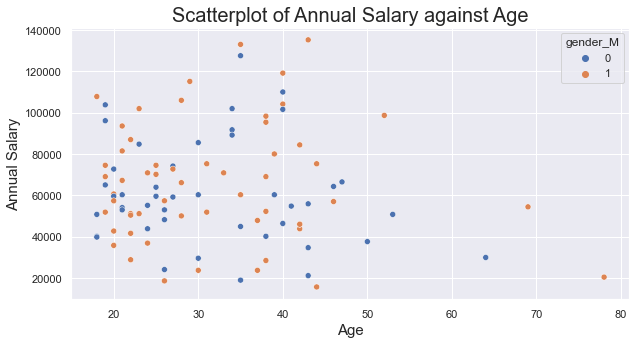

In [115]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
age_salary_graph = sns.scatterplot(x="age", y="annual_salary", hue = 'gender_M', data=features)
age_salary_graph.axes.set_title("Scatterplot of Annual Salary against Age",fontsize=20)
age_salary_graph.set_xlabel("Age", fontsize=15)
age_salary_graph.set_ylabel("Annual Salary", fontsize=15)

Text(0, 0.5, 'Annual Salary')

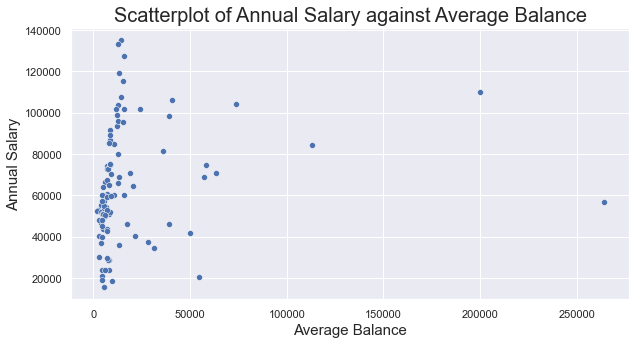

In [117]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
age_salary_graph = sns.scatterplot(x="avg_bal", y="annual_salary", data=features)
age_salary_graph.axes.set_title("Scatterplot of Annual Salary against Average Balance",fontsize=20)
age_salary_graph.set_xlabel("Average Balance", fontsize=15)
age_salary_graph.set_ylabel("Annual Salary", fontsize=15)

In [101]:
train, test = train_test_split(features, test_size=0.2, random_state=42)

In [102]:
X_train=train[['age', 'long', 'lat', 'avg_bal', 'gender_M']]
X_test=test[['age', 'long', 'lat', 'avg_bal', 'gender_M']]
y_train=train['annual_salary']
y_test=test['annual_salary']

In [103]:
reg = LinearRegression()

In [104]:
reg.fit(X_train, y_train)

LinearRegression()

In [105]:
reg.score(X_train, y_train)

0.04093111420207107

In [118]:
y_predict = reg.predict(X_test)

In [119]:
np.sqrt(metrics.mean_squared_error(y_test, pred))

23653.573296239665

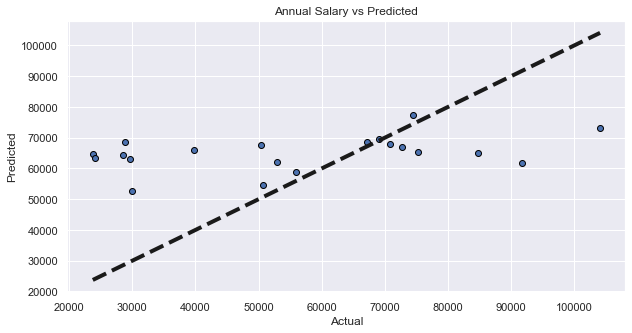

In [120]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [109]:
clf = DecisionTreeRegressor(max_depth=5,random_state=0)

In [110]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [111]:
clf.score(X_train, y_train)

0.89125702166197

In [122]:
c_predict = clf.predict(X_test)

In [123]:
np.sqrt(metrics.mean_squared_error(y_test, c_pred))

28828.0597455615

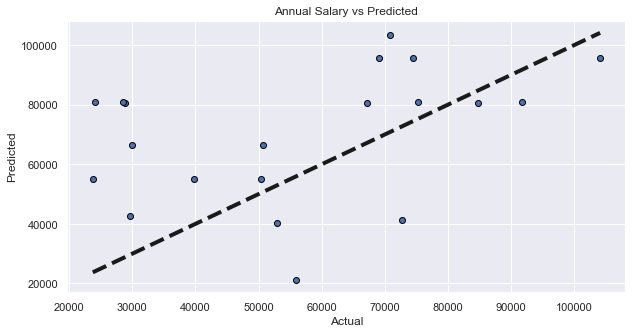

In [124]:
# Plot of predicted salary against actual salary
fig, ax = plt.subplots()
ax.scatter(y_test, c_predict, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()
